In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import tensorflow as tf

In [3]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.14.178.234:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.14.178.234:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.14.178.234:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock NSE internship/nse_data.csv')

In [5]:
data.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846404 entries, 0 to 846403
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SYMBOL       846404 non-null  object 
 1   SERIES       843947 non-null  object 
 2   OPEN         846404 non-null  float64
 3   HIGH         846404 non-null  float64
 4   LOW          846404 non-null  float64
 5   CLOSE        846404 non-null  float64
 6   LAST         846404 non-null  float64
 7   PREVCLOSE    846404 non-null  float64
 8   TOTTRDQTY    846404 non-null  int64  
 9   TOTTRDVAL    846404 non-null  float64
 10  TIMESTAMP    846404 non-null  object 
 11  TOTALTRADES  846404 non-null  int64  
 12  ISIN         846404 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 83.9+ MB


In [7]:
data.isnull().sum()

SYMBOL            0
SERIES         2457
OPEN              0
HIGH              0
LOW               0
CLOSE             0
LAST              0
PREVCLOSE         0
TOTTRDQTY         0
TOTTRDVAL         0
TIMESTAMP         0
TOTALTRADES       0
ISIN              0
dtype: int64

In [8]:
data.TIMESTAMP[0][5:7]

'06'

In [0]:
s1=slice(4)
data['YEAR']= data.TIMESTAMP.apply(lambda X: X[s1])

In [0]:
s2=slice(5,7)
data['MONTH'] = data.TIMESTAMP.apply(lambda X: X[s2])

In [11]:
data.MONTH.value_counts(ascending=False)

11    75288
05    74520
08    73788
12    73484
06    72868
09    70899
03    70885
07    70585
01    68374
10    68142
02    66529
04    61042
Name: MONTH, dtype: int64

In [12]:
data.YEAR.value_counts()

2017    437241
2016    409163
Name: YEAR, dtype: int64

In [13]:
corr_matrix=data.corr()
corr_matrix

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
OPEN,1.000000,0.999887,0.999906,0.999836,0.999743,0.999164,-0.031836,0.060235,0.022101
HIGH,0.999887,1.000000,0.999818,0.999917,0.999830,0.999111,-0.031754,0.060912,0.022765
LOW,0.999906,0.999818,1.000000,0.999902,0.999808,0.999081,-0.031861,0.059863,0.021678
CLOSE,0.999836,0.999917,0.999902,1.000000,0.999912,0.999061,-0.031768,0.060530,0.022334
LAST,0.999743,0.999830,0.999808,0.999912,1.000000,0.998969,-0.031744,0.060451,0.022429
PREVCLOSE,0.999164,0.999111,0.999081,0.999061,0.998969,1.000000,-0.031874,0.060044,0.022086
TOTTRDQTY,-0.031836,-0.031754,-0.031861,-0.031768,-0.031744,-0.031874,1.000000,0.447041,0.475124
TOTTRDVAL,0.060235,0.060912,0.059863,0.060530,0.060451,0.060044,0.447041,1.000000,0.856671
TOTALTRADES,0.022101,0.022765,0.021678,0.022334,0.022429,0.022086,0.475124,0.856671,1.000000


In [14]:
corr_matrix.describe()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.672115,0.672276,0.672022,0.672192,0.672155,0.671738,0.192370,0.296194,0.273910
std,0.492005,0.491778,0.492136,0.491917,0.491878,0.491782,0.370574,0.381772,0.401148
min,-0.031836,-0.031754,-0.031861,-0.031768,-0.031744,-0.031874,-0.031874,0.059863,0.021678
25%,0.060235,0.060912,0.059863,0.060530,0.060451,0.060044,-0.031836,0.060235,0.022101
50%,0.999743,0.999818,0.999808,0.999836,0.999743,0.999061,-0.031754,0.060530,0.022429
75%,0.999887,0.999887,0.999902,0.999912,0.999830,0.999111,0.447041,0.447041,0.475124
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
corr_matrix['CLOSE'].sort_values(ascending=False)

CLOSE          1.000000
HIGH           0.999917
LAST           0.999912
LOW            0.999902
OPEN           0.999836
PREVCLOSE      0.999061
TOTTRDVAL      0.060530
TOTALTRADES    0.022334
TOTTRDQTY     -0.031768
Name: CLOSE, dtype: float64

In [0]:
year_2016 = ['2016']
data_train = data[data.YEAR.isin(year_2016)]

In [0]:
year_2017 = ['2017']
data_test = data[data.YEAR.isin(year_2017)]

In [0]:
X_train = data_train.drop('CLOSE',axis=1)
y_train = data_train.CLOSE

In [0]:
X_test = data_test.drop('CLOSE',axis=1)
y_test = data_test.CLOSE

In [0]:
X_train.drop(['SYMBOL','SERIES','TIMESTAMP','ISIN'],axis=1,inplace=True)

In [0]:
X_test.drop(['SYMBOL','SERIES','TIMESTAMP','ISIN'],axis=1,inplace=True)

In [0]:
X_train_1 = X_train.to_numpy()
X_test_1 = X_test.to_numpy()
y_train_1 = y_train.to_numpy()
y_test_1 = y_test.to_numpy()

In [23]:
X_train_1

array([[33.9, 35.0, 32.25, ..., 253, '2016', '04'],
       [4.4, 4.45, 4.3, ..., 360, '2016', '04'],
       [13939.7, 14200.0, 13324.0, ..., 722, '2016', '04'],
       ...,
       [95.3, 97.4, 94.25, ..., 37, '2016', '09'],
       [900.0, 910.0, 886.05, ..., 795, '2016', '09'],
       [2.9, 3.05, 2.9, ..., 66, '2016', '09']], dtype=object)

In [0]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()
model.fit(X_train_1,y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(X_test_1)

In [27]:
y_pred[0]

36.71034298899318

In [28]:
y_test[0]

36.85

In [29]:
score= model.score(X_test_1,y_test_1)
score

0.9999618279613472

In [30]:
model.score(X_train_1,y_train_1)

0.9999451092379198

Text(0.5, 1.0, 'CLOSE data for 2016 and 2017')

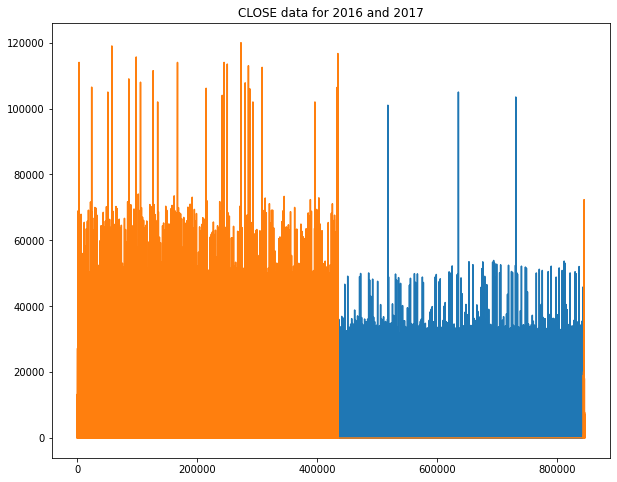

In [76]:
data_train.CLOSE.plot(figsize=(10,8))
data_test.CLOSE.plot()
plt.title('CLOSE data for 2016 and 2017')

[]

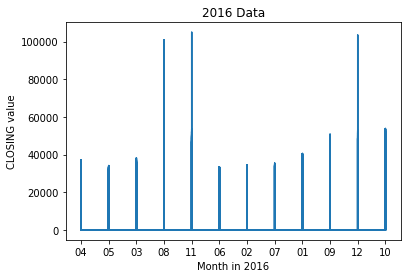

In [79]:
plt.plot(X_train.MONTH,y_train)
plt.title('2016 Data')
plt.xlabel('Month in 2016')
plt.ylabel('CLOSING value')
plt.plot(figsize=(12,8))

In [0]:
dicts = {'Predicted_CLOSE':y_pred}

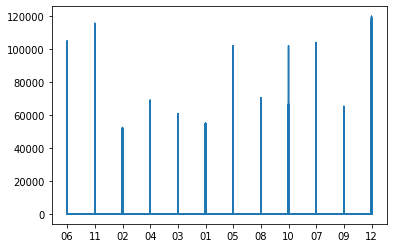

In [105]:
plt.plot(X_test.MONTH,dicts['Predicted_CLOSE'])

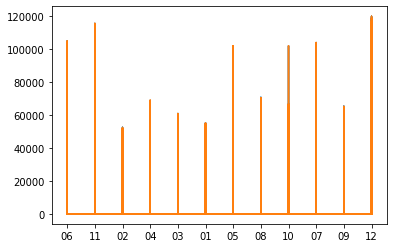

In [109]:
plt.plot(X_test.MONTH,y_test)
plt.plot(X_test.MONTH,dicts['Predicted_CLOSE'])

[]

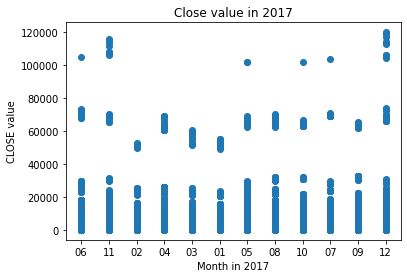

In [117]:
plt.scatter(X_test.MONTH,y_pred)
plt.xlabel('Month in 2017')
plt.ylabel('CLOSE value')
plt.title('Close value in 2017')
plt.plot()

[]

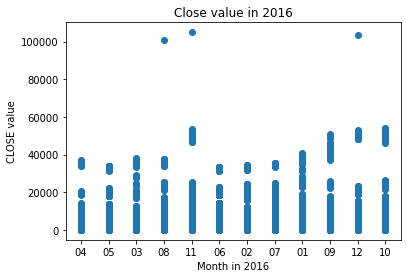

In [118]:
plt.scatter(X_train.MONTH,y_train)
plt.xlabel('Month in 2016')
plt.ylabel('CLOSE value')
plt.title('Close value in 2016')
plt.plot()

In [0]:
list_months = [1,2,3,4,5,6,7,8,9,10,11,12]

Text(0.5, 1.0, 'CLOSE value in 2016 and 2017')

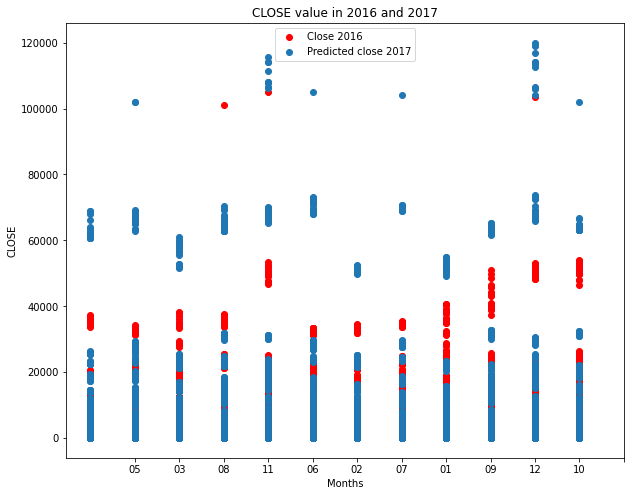

In [145]:
plt.figure(figsize=(10,8))
plt.scatter(X_train.MONTH,y_train,c='r',label='Close 2016')
plt.scatter(X_test.MONTH,y_pred,label='Predicted close 2017')
plt.xticks(ticks=list_months)
plt.xlabel('Months')
plt.ylabel('CLOSE')
plt.legend(loc='upper center')
plt.title('CLOSE value in 2016 and 2017')